<a href="https://colab.research.google.com/github/satvikGarre/McDonalds/blob/main/McD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

mcdonalds = pd.read_csv("mcdonalds.csv")

# Display column names
print("Column Names:\n", mcdonalds.columns)

# Get dataset dimensions
print("Dataset Dimensions (Rows, Columns):", mcdonalds.shape)

# Display the first 3 rows
print("First 3 Rows:\n", mcdonalds.head(3))


Column Names:
 Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
Dataset Dimensions (Rows, Columns): (1453, 15)
First 3 Rows:
   yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [ ]:
# Select the first 11 columns and map "Yes" to 1, "No" to 0
MD_x = mcdonalds.iloc[:, 0:11].applymap(lambda x: 1 if x == "Yes" else 0)

# Calculate column means
print("Column Means:\n", MD_x.mean().round(2))


Column Means:
 yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


<ipython-input-3-8a7d05aa455c>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  MD_x = mcdonalds.iloc[:, 0:11].applymap(lambda x: 1 if x == "Yes" else 0)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize data for PCA
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(MD_x_scaled)

# Explained variance ratio
print("Explained Variance Ratio:\n", pca.explained_variance_ratio_)
print("Cumulative Explained Variance:\n", pca.explained_variance_ratio_.cumsum())


Explained Variance Ratio:
 [0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]
Cumulative Explained Variance:
 [0.25556637 0.40391399 0.52938308 0.62765279 0.71113635 0.78222737
 0.84721295 0.90105773 0.94868581 0.9766496  1.        ]


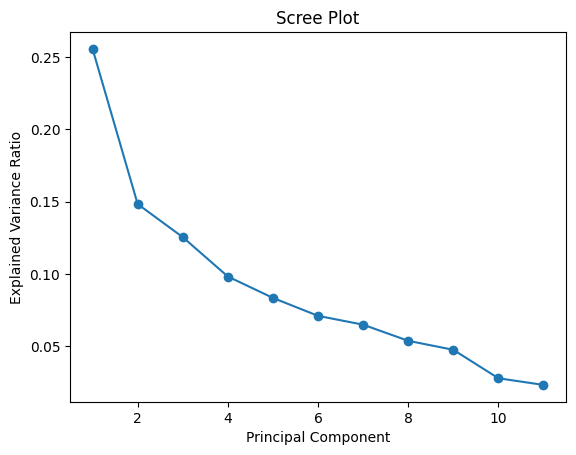

In [ ]:
import matplotlib.pyplot as plt

# Scree plot of PCA
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()


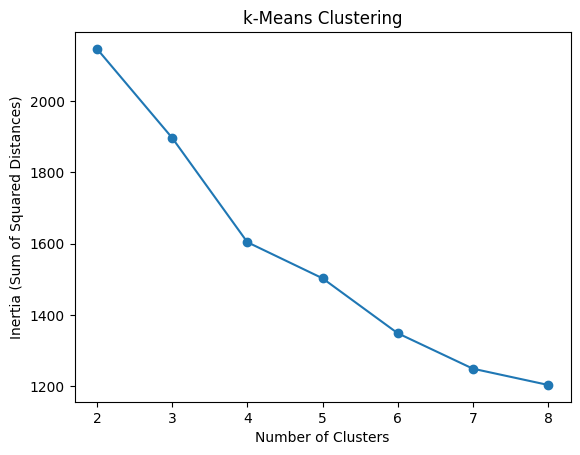

In [ ]:
from sklearn.cluster import KMeans

# Run k-means for 2 to 8 clusters
inertia_values = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MD_x)
    inertia_values.append(kmeans.inertia_)

# Plot inertia
plt.plot(range(2, 9), inertia_values, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("k-Means Clustering")
plt.show()


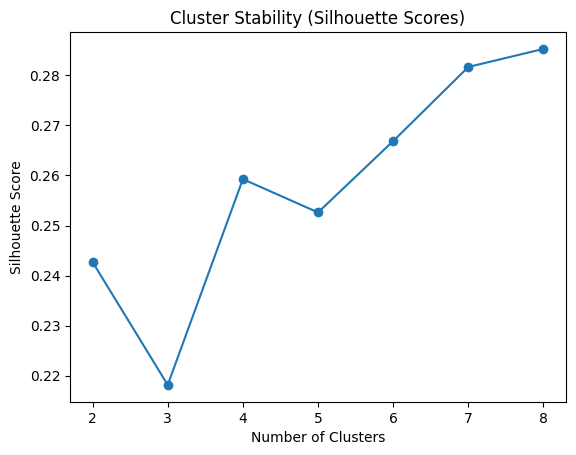

In [ ]:
# Stability evaluation requires specialized libraries, such as clustree in R.
# Python equivalent analysis can use silhouette scores for quality assessment.
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=1234)
    labels = kmeans.fit_predict(MD_x)
    score = silhouette_score(MD_x, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 9), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Cluster Stability (Silhouette Scores)")
plt.show()


In [ ]:
# Example for profiling clusters
kmeans_4 = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
cluster_profiles = MD_x.groupby(kmeans_4.labels_).mean()
print("Cluster Profiles:\n", cluster_profiles)


Cluster Profiles:
       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  0.887931    0.981034  0.086207   0.794828  0.329310  0.960345  0.922414   
1  0.017544    0.653509  0.078947   0.907895  0.701754  0.728070  0.074561   
2  0.024845    0.900621  0.077640   0.928571  0.664596  0.953416  0.878882   
3  0.854489    0.962848  0.133127   0.907121  0.619195  0.860681  0.108359   

      tasty  expensive   healthy  disgusting  
0  0.975862   0.017241  0.320690    0.043103  
1  0.087719   0.951754  0.065789    0.706140  
2  0.152174   0.009317  0.068323    0.413043  
3  0.931889   0.897833  0.204334    0.105263  


In [ ]:
# Fit k-means with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=1234)
cluster_labels = kmeans_3.fit_predict(MD_x)

# Display cluster sizes
import numpy as np
unique, counts = np.unique(cluster_labels, return_counts=True)
print("Cluster Sizes:\n", dict(zip(unique, counts)))


Cluster Sizes:
 {0: 837, 1: 295, 2: 321}


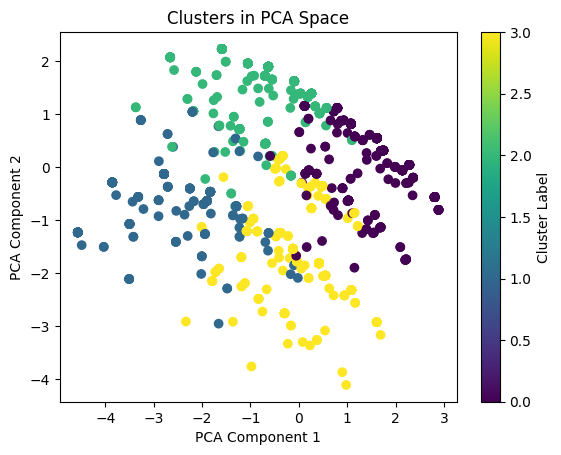

In [ ]:
# Visualize clusters in PCA space
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_4.labels_, cmap='viridis', marker='o')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters in PCA Space")
plt.colorbar(label="Cluster Label")
plt.show()


In [ ]:
# Calculate mean responses per cluster
cluster_profiles = MD_x.groupby(cluster_labels).mean()
print("Cluster Profiles:\n", cluster_profiles)


Cluster Profiles:
       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  0.909200    0.977300  0.099164   0.832736  0.416965  0.941458  0.679809   
1  0.118644    0.718644  0.105085   0.898305  0.677966  0.711864  0.040678   
2  0.021807    0.900312  0.068536   0.928349  0.672897  0.965732  0.900312   

      tasty  expensive   healthy  disgusting  
0  0.973716   0.280765  0.295102    0.051374  
1  0.250847   0.935593  0.067797    0.589831  
2  0.146417   0.028037  0.068536    0.423676  


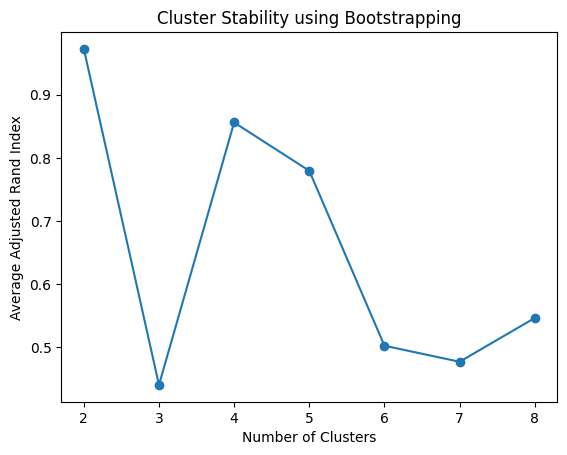

In [ ]:
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
import numpy as np

# Function for bootstrapping stability
def bootstrap_stability(data, clusters_range, n_boot=100, random_state=1234):
    np.random.seed(random_state)
    stability_scores = {k: [] for k in clusters_range}

    for k in clusters_range:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(data)
        original_labels = kmeans.labels_

        for _ in range(n_boot):
            # Bootstrap sample
            boot_data = resample(data, random_state=random_state)
            kmeans_boot = KMeans(n_clusters=k, random_state=random_state)
            kmeans_boot.fit(boot_data)
            boot_labels = kmeans_boot.predict(data)

            # Compute Adjusted Rand Index
            ari = adjusted_rand_score(original_labels, boot_labels)
            stability_scores[k].append(ari)

    # Average stability scores for each k
    avg_stability = {k: np.mean(scores) for k, scores in stability_scores.items()}
    return avg_stability

# Perform bootstrapping for cluster stability
clusters_range = range(2, 9)
stability_scores = bootstrap_stability(MD_x, clusters_range)

# Plot stability scores
plt.plot(clusters_range, list(stability_scores.values()), marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Average Adjusted Rand Index")
plt.title("Cluster Stability using Bootstrapping")
plt.show()


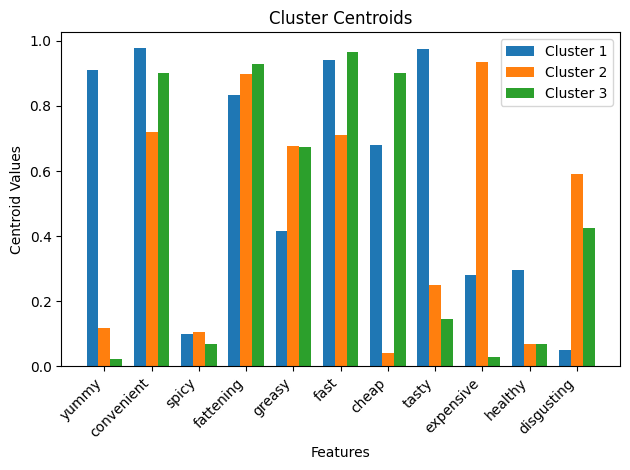

In [ ]:
# Visualize cluster centroids
kmeans_3 = KMeans(n_clusters=3, random_state=1234).fit(MD_x)
centroids = kmeans_3.cluster_centers_

# Bar plot of centroids
x_labels = MD_x.columns
x = np.arange(len(x_labels))

fig, ax = plt.subplots()
for i, centroid in enumerate(centroids):
    ax.bar(x + i * 0.25, centroid, width=0.25, label=f'Cluster {i + 1}')

ax.set_xticks(x + 0.25)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Centroid Values")
plt.title("Cluster Centroids")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test for a single feature
# Replace 'actual_column_name' with the actual name of the feature column in your DataFrame
feature = "yummy"
clusters = kmeans_3.labels_

stat, p_value = kruskal(*[MD_x[clusters == i][feature] for i in np.unique(clusters)])
print(f"Kruskal-Wallis Test for {feature}:")
print(f"Statistic: {stat}, p-value: {p_value}")

Kruskal-Wallis Test for yummy:
Statistic: 1020.3317827364501, p-value: 2.7401133179286293e-222


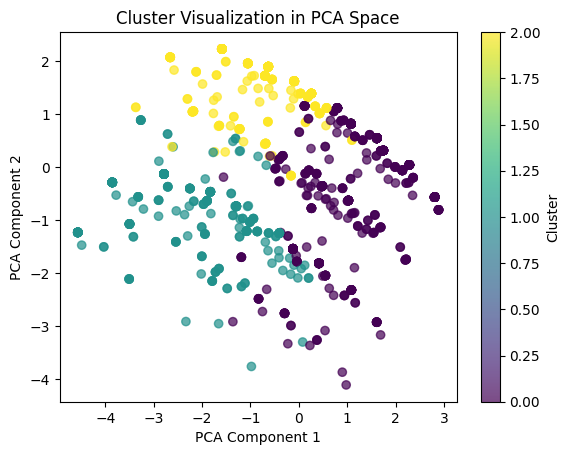

In [ ]:
# Scatter plot of PCA space with clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_3.labels_, cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Cluster Visualization in PCA Space")
plt.colorbar(label="Cluster")
plt.show()


Average Silhouette Score: 0.21812819839526182


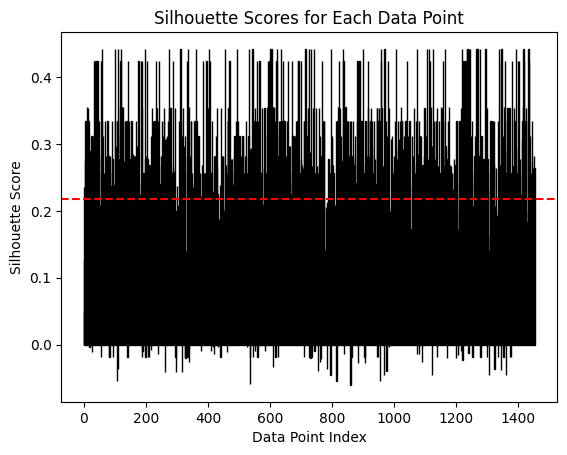

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate silhouette scores
silhouette_avg = silhouette_score(MD_x, kmeans_3.labels_)
sample_silhouette_values = silhouette_samples(MD_x, kmeans_3.labels_)

print(f"Average Silhouette Score: {silhouette_avg}")

# Visualize silhouette scores
plt.bar(range(len(sample_silhouette_values)), sample_silhouette_values, color='skyblue', edgecolor='k')
plt.axhline(y=silhouette_avg, color='r', linestyle='--')
plt.xlabel("Data Point Index")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Each Data Point")
plt.show()


In [ ]:
# Aggregate data by clusters
cluster_profiles = pd.DataFrame(MD_x).groupby(kmeans_3.labels_).mean()
print("Cluster Profiles:\n", cluster_profiles)


Cluster Profiles:
       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  0.909200    0.977300  0.099164   0.832736  0.416965  0.941458  0.679809   
1  0.118644    0.718644  0.105085   0.898305  0.677966  0.711864  0.040678   
2  0.021807    0.900312  0.068536   0.928349  0.672897  0.965732  0.900312   

      tasty  expensive   healthy  disgusting  
0  0.973716   0.280765  0.295102    0.051374  
1  0.250847   0.935593  0.067797    0.589831  
2  0.146417   0.028037  0.068536    0.423676  
